In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

In [3]:
df = pd.read_csv('data/extracted_data.csv')
display(df)

,id,commented_sec,comment,is_emoticon
0,0,0,うんこのってる,False
1,1,2,トラック？,False
2,2,5,脱糞おじさん,False
3,3,6,つまりスタヌが雑魚ってこと？,False
4,4,6,バレッドだっけ？ffの,False
...,...,...,...,...
711,711,1263,spygeaG spygeaG spygeaG spygeaG spygeaG,True
712,712,1263,見どころありすぎいいい,False
713,713,1263,つよ,False
714,714,1263,ギアさんのクレーバーほんとすこ,False


In [4]:
df['commented_min'] = df['commented_sec'] // 60

In [5]:
# コメント末尾が草
df['has_w'] = df['comment'].apply(lambda x : 1if (x[-1] == 'w') or (x[-1] == 'W') or (x[-1] == 'ｗ') or (x[-1] == 'W') or (x[-1] ==  '草') else 0)

In [6]:
# スタンプ
df['is_emoticon_enc'] = df['is_emoticon'].apply(lambda x : 1 if x else 0)

In [7]:
display(df)

,id,commented_sec,comment,is_emoticon,commented_min,has_w,is_emoticon_enc
0,0,0,うんこのってる,False,0,0,0
1,1,2,トラック？,False,0,0,0
2,2,5,脱糞おじさん,False,0,0,0
3,3,6,つまりスタヌが雑魚ってこと？,False,0,0,0
4,4,6,バレッドだっけ？ffの,False,0,0,0
...,...,...,...,...,...,...,...
711,711,1263,spygeaG spygeaG spygeaG spygeaG spygeaG,True,21,0,1
712,712,1263,見どころありすぎいいい,False,21,0,0
713,713,1263,つよ,False,21,0,0
714,714,1263,ギアさんのクレーバーほんとすこ,False,21,0,0


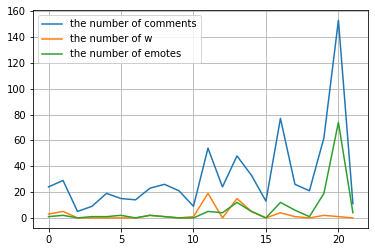

In [18]:
fig, ax = plt.subplots()
x = df.groupby('commented_min').count().index
ax.plot(x, df.groupby('commented_min').count().id.values, label='the number of comments')
ax.plot(x,df.groupby('commented_min').sum().has_w.values, label='the number of w')
ax.plot(x,df.groupby('commented_min').sum().is_emoticon_enc.values, label='the number of emotes')
ax.grid(axis='both')
ax.legend()
plt.show()